# MAS DSE 200: Homework 2 - Pandas

#### Tasks:

- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 2"


---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission.
* To obtain full marks for a question, both the answer and the code should be correct.
* Completely wrong (or missing) code with correct answer will result in zero marks.
* Please code the solution in the space provided.

### Imports

Import necessary packages

In [1]:
!pip install pandas numpy requests pillow rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 53.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path
from PIL import Image
from io import BytesIO
import rasterio
from rasterio.transform import from_bounds

## Part 1: Titanic

### Preliminaries

* Grab the dataset from `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv` and store it in a pandas dataframe called `passengers`.

In [3]:
# YOUR CODE HERE
# download from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv
with open('titanic.csv', 'wb') as f:
    response = requests.get('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv')
    f.write(response.content)

In [4]:
# open the csv file as a pandas dataframe
passengers = None
passengers=pd.read_csv('titanic.csv')
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1: Get to know your data - **20 points**

**1.1**: Print the first 15 entries in the dataframe to see what the columns are and what some values will look like - **5 points**

In [5]:
# YOUR CODE HERE
passengers.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**1.2**: Next, set the index of the dataframe to the `PassengerId` column, and print the first 10 elements again to ensure the change took place - **5 points**

In [6]:
# YOUR CODE HERE
passengers.set_index('PassengerId', drop=True,  inplace = True)
passengers.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


**1.3**: How many samples are there in this dataset? - **5 points**

In [7]:
# YOUR CODE HERE
passengers.shape[0]
# or len(passengers)

891

**1.4** How many samples contain `null`/`NaN` in atleast one of the columns? - **5 points**

In [8]:
# YOUR CODE HERE
#int(
int(passengers.isnull().any(axis=1).sum())

708

### 2: Summary statistics - **30 points**

**2.1**: Print the `min`, `max`, `mean` and `median` of age and fare of all passengers - **10 points**

Hint - Look at [`DataFrame.agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg)

In [9]:
# YOUR CODE HERE
passengers[['Age', 'Fare']].agg(['min', 'max', 'mean', 'median'])

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
mean,29.699118,32.204208
median,28.000000,14.454200


**2.2**: What is the average ticket fare price for male vs female passengers on the Titanic? - **10 points**

Note - The output should only have `Sex` and `Fare`

*Hint* - Look at [`DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)

In [10]:
# YOUR CODE HERE
passengers[['Fare', 'Sex']].groupby('Sex').mean('Fare')

,Fare
Sex,
female,44.479818
male,25.523893


**2.3** What is the mean age for each of the sex and cabin class combinations? - **10 points**

In [11]:
# YOUR CODE HERE
# Assuming that the passenger class is what is meant by cabin class vs using the Cabin column
passengers[['Age','Sex','Pclass']].groupby(['Sex','Pclass']).mean('Age')

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

### 3:  Number of passengers in different classes - **20 points**

**3.1**: What is the number of passenges in different classes according to this dataset? (Hint: Pclass represents the class of a passenger.) - **5 points**

In [12]:
# YOUR CODE HERE
passengers.groupby('Pclass').size()

,0
Pclass,
1,216
2,184
3,491


**3.2** How many passengers in 1st class (`Pclass = 1`) are women (`Sex = female`) above the age of 27? - **5 points**

In [13]:
# YOUR CODE HERE
passengers.loc[(passengers['Pclass'] == 1) & (passengers['Sex']=='female') & (passengers['Age']>27)].shape[0]

56

In [14]:
passengers.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


**3.3** What fraction of passengers from each class survived? (`Survived=1`) - **10 points**

In [15]:
# YOUR CODE HERE
survival_rate = passengers[['Pclass','Survived']].groupby('Pclass').mean()
survival_rate

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 4:  Fares - **30 points**

**4.1**: How many different fares were charged on the Titanic based on the dataset? - **5 points**

In [16]:
# YOUR CODE HERE
passengers['Fare'].nunique()

248

In [17]:
passengers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**4.2**: Find the top 10 fares charged from the passengers. **Report these fare values**, and then **calculate the total number of passengers** who paid one of these top 10 fare amounts - **10 points**

In [18]:
# YOUR CODE HERE
top_10_fares = passengers['Fare'].value_counts().sort_values(ascending=False).head(10).index
top_10_fares
# top_10_fares = passengers['Fare'].sort_values(ascending=False).drop_duplicates().reset_index(drop=True).head(10).values

passengers_paid_top_10 = int(passengers['Fare'].isin(top_10_fares).sum())
#print(f'Top 10 Fares: {top_10_fares}')
passengers_paid_top_10


276

**4.3**: Create a new dataset, called `passengers_filtered`, that includes only entries of passengers who paid one of these top 10 fares. **Report the number of samples** in the original dataset and in the new dataset to ensure the desired effect took place - **10 points**

**hint:** Check out the Pandas Series function [isin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

In [19]:
# YOUR CODE HERE
passengers_filtered = passengers.loc[passengers['Fare'].isin(top_10_fares)]
print(f'Total passenger count: {passengers.shape[0]}\nTotal top 10 fare passenger count: {passengers_filtered.shape[0]}')

Total passenger count: 891
Total top 10 fare passenger count: 276


### 5:  Ages - **30 points**

**5.1**: What was the minimum, maximum and average age of passengers on the Titanic? - **5 points**

In [20]:
# YOUR CODE HERE
passengers['Age'].agg(['min','max','mean'])

,Age
min,0.420000
max,80.000000
mean,29.699118


**5.2**: How many passengers on the Titanic were within one standard deviation of the mean age calculated in **5.1**? - **10 points**

In [21]:
# YOUR CODE HERE
std_age = passengers['Age'].std()
above_std = passengers['Age'].mean() + std_age
below_std = passengers['Age'].mean() - std_age

passengers_in_std = passengers[['Age','Sex']].loc[(passengers['Age']<above_std) & (passengers['Age']>below_std)]
passengers_in_std.shape[0]

516

**5.3**: How many of the passengers found in **5.2** were females over the age of 25? - **5 points**

In [22]:
# YOUR CODE HERE
female_passengers_in_std = passengers_in_std.loc[(passengers_in_std['Sex']=='female') & (passengers_in_std['Age']>25)]
female_passengers_in_std.shape[0]

103

**5.4**: What are the 10 **most** common ages of passengers according to this dataset? - **5 points**

In [23]:
# YOUR CODE HERE
passengers_top_10_ages = pd.DataFrame(passengers['Age'].value_counts().head(10).index).sort_values(by='Age')
passengers_top_10_ages
std_female_top_10_ages = pd.DataFrame(female_passengers_in_std['Age'].value_counts().head(10).index).sort_values(by='Age')
print(f'10 most common ages.\n In passengers dataset:\n {passengers_top_10_ages}\n In Top 10 Female Ages:\n {std_female_top_10_ages}')

10 most common ages.
 In passengers dataset:
     Age
2  18.0
5  19.0
6  21.0
1  22.0
0  24.0
7  25.0
3  28.0
9  29.0
4  30.0
8  36.0
 In Top 10 Female Ages:
     Age
7  27.0
4  28.0
3  29.0
0  30.0
2  31.0
6  33.0
1  35.0
5  36.0
9  39.0
8  40.0


## Part 2: Beer Review - 20 points

Use the `beer_reviews` dataframe created for you

In [24]:
reviews = []
response = requests.get("https://dse200.dev/Day2/beer_50000.json") #"https://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json")
for line in response.text.splitlines():
    reviews.append(eval(line))

beer_reviews = pd.DataFrame(reviews)
beer_reviews

,review/appearance,beer/style,review/palate,review/taste,beer/name,review/timeUnix,beer/ABV,beer/beerId,beer/brewerId,review/timeStruct,review/overall,review/text,user/profileName,review/aroma,user/gender,user/birthdayRaw,user/birthdayUnix,user/ageInSeconds
0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,1234817823,5.0,47986,10325,"{'isdst': 0, 'mday': 16, 'hour': 20, 'min': 57...",1.5,A lot of foam. But a lot.\tIn the smell some b...,stcules,2.0,NaN,NaN,NaN,NaN
1,3.0,English Strong Ale,3.0,3.0,Red Moon,1235915097,6.2,48213,10325,"{'isdst': 0, 'mday': 1, 'hour': 13, 'min': 44,...",3.0,"Dark red color, light beige foam, average.\tIn...",stcules,2.5,NaN,NaN,NaN,NaN
2,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,1235916604,6.5,48215,10325,"{'isdst': 0, 'mday': 1, 'hour': 14, 'min': 10,...",3.0,"Almost totally black. Beige foam, quite compac...",stcules,2.5,NaN,NaN,NaN,NaN
3,3.5,German Pilsener,2.5,3.0,Sausa Pils,1234725145,5.0,47969,10325,"{'isdst': 0, 'mday': 15, 'hour': 19, 'min': 12...",3.0,"Golden yellow color. White, compact foam, quit...",stcules,3.0,NaN,NaN,NaN,NaN
4,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,1293735206,7.7,64883,1075,"{'isdst': 0, 'mday': 30, 'hour': 18, 'min': 53...",4.0,"According to the website, the style for the Ca...",johnmichaelsen,4.5,Male,"Jun 16, 1901",-2.163082e+09,3.581417e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4.0,American Double / Imperial Stout,4.0,4.0,Stoudt's Fat Dog (Imperial Oatmeal Stout),1196810078,9.0,20539,394,"{'isdst': 0, 'mday': 4, 'hour': 23, 'min': 14,...",4.0,Bottled on 5/16/2007 and poured into an Imperi...,Jwale73,4.0,NaN,NaN,NaN,NaN
49996,3.5,American Double / Imperial Stout,4.0,4.0,Stoudt's Fat Dog (Imperial Oatmeal Stout),1196388069,9.0,20539,394,"{'isdst': 0, 'mday': 30, 'hour': 2, 'min': 1, ...",4.0,The first beer I put away for cellaring. 12 oz...,bigeyedfish,4.0,NaN,NaN,NaN,NaN
49997,4.0,American Double / Imperial Stout,4.0,4.5,Stoudt's Fat Dog (Imperial Oatmeal Stout),1196218959,9.0,20539,394,"{'isdst': 0, 'mday': 28, 'hour': 3, 'min': 2, ...",3.5,12 oz. bottle sampled in a La Fin du Monde tul...,stewdawg,3.5,NaN,NaN,NaN,NaN
49998,4.0,American Double / Imperial Stout,4.0,4.5,Stoudt's Fat Dog (Imperial Oatmeal Stout),1196138077,9.0,20539,394,"{'isdst': 0, 'mday': 27, 'hour': 4, 'min': 34,...",4.0,"I'm on my second case of Fat Dog, so you kind ...",On2Wheels,4.0,NaN,NaN,NaN,NaN


**6.1**: Which are the top 15 beers with the highest average ratings (`review/overall`)? - **10 points**

In [25]:
## YOUR CODE HERE
# top 15 highest average ratings (review / overall)
top_15 = beer_reviews[['beer/style','review/overall']].groupby('beer/style').mean('review/overall').sort_values(by ='review/overall', ascending=False).reset_index().head(15)
top_15['beer/style']

,beer/style
0,American Double / Imperial Stout
1,English Barleywine
2,Keller Bier / Zwickel Bier
3,Rye Beer
4,Russian Imperial Stout
5,Munich Helles Lager
6,Baltic Porter
7,English Dark Mild Ale
8,American IPA
9,American Porter


**6.2**: Which of the following - `review/palate`, `review/taste`, `review/aroma`, length of `review/text`(number of words in the review text) - correlate highest with `review/overall`? - **10 points**

NOTE - `review/text` is of type string while the other reviews are of type float. Use the length of `review/text` instead. You may need to create a new column in the data frame

In [26]:
# YOUR CODE HERE
# change review/text to number of words in review (.split() will break each individual word down into a list then len counts the words)
beer_reviews['len_of_review_text'] = beer_reviews['review/text'].apply(lambda x: len(x.split()))
beer_reviews['len_of_review_text']
# check correlation
correlation_matrix = beer_reviews[['review/palate', 'review/taste', 'review/aroma','len_of_review_text','review/overall']].corr()['review/overall']

# Drop the review/overall row from the matrix since 1.0 then sort the values highest to lowest and keep the top

top_correlation = correlation_matrix.drop('review/overall',axis=0).sort_values(ascending=False).head(1)
top_correlation

,review/overall
review/taste,0.784999


## Part 3: Geospatial Data - 10 points

In [27]:

data_dir = Path('fire_data')
data_dir.mkdir(exist_ok=True)

In [28]:
# Select a new area
# http://bboxfinder.com/#-117.500249,32.665157,-116.820470,33.012173
# Go to the above link and select an area of interest
# Example bbox for San Diego area: [-117.500249, 32.665157, -116.820470, 33.012173]
bbox = [-117.500249, 32.665157, -116.820470, 33.012173]  # Replace with your chosen area

print(f"Study Area Bounding Box: {bbox}")
print(f"Longitude: {bbox[0]:.2f} to {bbox[2]:.2f}")
print(f"Latitude: {bbox[1]:.2f} to {bbox[3]:.2f}")

Study Area Bounding Box: [-117.500249, 32.665157, -116.82047, 33.012173]
Longitude: -117.50 to -116.82
Latitude: 32.67 to 33.01


In [43]:
def get_naip_imagery(bbox, output_path):
    """
    Fetch NAIP imagery - simple version
    Always gets 1024x1024 pixels, no calculations
    """
    base_url = "https://imagery.nationalmap.gov/arcgis/rest/services/USGSNAIPImagery/ImageServer/exportImage"

    params = {
        'bbox': f"{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}",
        'bboxSR': '4326',
        'size': '1024, 1024',
        'imageSR': '4326',
        'format': 'tiff',  # Get TIFF to preserve all bands
        'pixelType': 'U16',
        'f': 'image'
    }

    print(f"Requesting NAIP imagery: 1024x1024 pixels")
    response = requests.get(base_url, params=params, timeout=120)

    if response.status_code == 200:
        # Save directly - no conversion needed
        with open(output_path, 'wb') as f:
            f.write(response.content)

        print(f"✓ NAIP imagery saved to {output_path}")
        return True
    else:
        print(f"Error fetching NAIP: {response.status_code}")
        return False


# Use it
naip_file = data_dir / 'naip_imagery.tif'
print("Downloading NAIP imagery...")
success = get_naip_imagery(bbox, naip_file)

# This references the return true or false part of the function
if success:
    # Check what we got
    with rasterio.open(naip_file) as src:
        print(f"Bands: {src.count}")
        print(f"Size: {src.width}x{src.height}")

Requesting NAIP imagery: 1024x1024 pixels
✓ NAIP imagery saved to fire_data/naip_imagery.tif
Bands: 4
Size: 1024x1024


### Task - Geospatial Data Analysis - 10 points

Based on the NAIP imagery data you've downloaded, create your own analytics to explore the geospatial data.

**Requirements (10 points total):**
1. **Visualize the imagery** (3 points) - Display the RGB bands properly
2. **Identify color patterns** (3 points) - Create masks to identify 2 colors (e.g., green for vegetation, brown for bare soil) or any other colors of your choice
3. **Analyze spatial patterns** (4 points) - Use your color masks to calculate statistics (e.g., percentage of green vs brown areas, spatial distribution)

You should create 3 different visualizations or analyses demonstrating your understanding of geospatial data manipulation with pandas and rasterio.

# Visualize the imagery (3 points)
- Display the RGB bands properly

In [30]:
import matplotlib.pyplot as plt

In [62]:
# Your code here

with rasterio.open(naip_file) as src:
  # try first three color channels (1 = red, 2 = green & 3= blue)
  # the values being read are the brightness levels for each of the channels
    img = src.read([1, 2, 3])
    print("Min:", img.min(), "Max:", img.max())

# Compute per-band percentiles to stretch contrast
# low = the values below which 2% of the pixles fall
# high = the value below which 98% of the pixels fall
low, high = np.percentile(img, (2, 98))

# to stretch the image we subtract the 2% of pixels below low
# then divide that by (value that 98% of img's values fall below - value that 2% of img's values falls below). high - low isn’t “moving them in” the edges — it’s measuring how wide the new middle section is and then stretching it to fill the display
print(f'low: {low} \n high: {high}')
img_stretch = np.clip((img - low) / (high - low), 0, 1)

#Move bands and plot
plt.figure(figsize=(8,8))
plt.imshow(np.moveaxis(img_stretch, 0, -1))
plt.title("NAIP RGB Imagery (stretched contrast)")
plt.axis('off')
plt.show()

Min: 0 Max: 192
low: 0.0 
 high: 130.0


np.float64(130.0)

# Identify color patterns (3 points)
- Create masks to identify 2 colors (e.g., green for vegetation, brown for bare soil) or any other colors of your choice

(1024, 1024, 3)
img_stretch shape: (1024, 1024, 3)


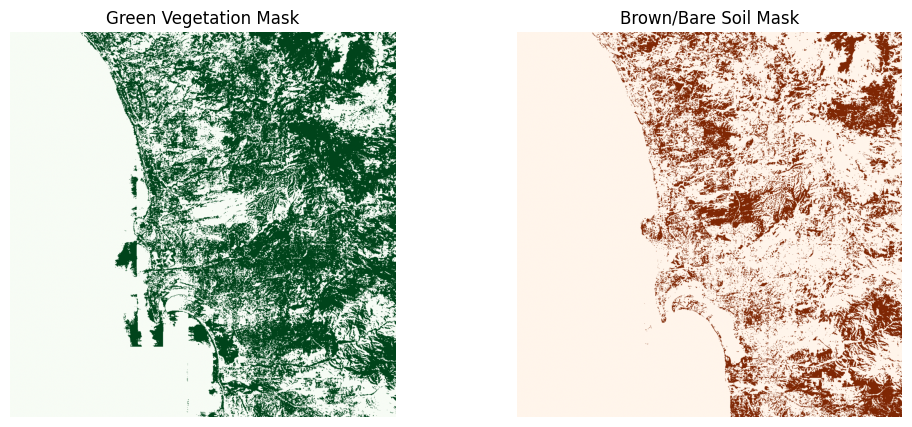

In [32]:
# ---- Create color masks ----
img_stretch = np.moveaxis(img_stretch, 0, -1)
print(img_stretch.shape)

# Green vegetation = pixels where green channel > red and blue channels
green_mask = (img_stretch[:, :, 1] > img_stretch[:, :, 0]) & (img_stretch[:, :, 1] > img_stretch[:, :, 2])

# Brownish soil = pixels where red channel > green and blue channels
brown_mask = (img_stretch[:, :, 0] > img_stretch[:, :, 1]) & (img_stretch[:, :, 0] > img_stretch[:, :, 2])

print("img_stretch shape:", img_stretch.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(green_mask, cmap='Greens')
plt.title("Green Vegetation Mask")
plt.axis('off')
plt.gca().set_aspect('equal')

plt.subplot(1,2,2)
plt.imshow(brown_mask, cmap='Oranges')
plt.title("Brown/Bare Soil Mask")
plt.axis('off')
plt.gca().set_aspect('equal')

plt.show()

# Analyze spatial patterns (4 points)
- Use your color masks to calculate statistics (e.g., percentage of green vs brown areas, spatial distribution)

In [33]:
# Count how many True pixels there are in each mask
green_pixels = np.count_nonzero(green_mask)
brown_pixels = np.count_nonzero(brown_mask)

# Count total non-black pixels (exclude NODATA)
valid_pixels = np.count_nonzero(img_stretch.mean(axis=2) > 0)

print("Green pixels:", green_pixels)
print("Brown pixels:", brown_pixels)
print("Valid pixels:", valid_pixels)


green_percent = green_pixels / valid_pixels * 100
brown_percent = brown_pixels / valid_pixels * 100

print(f"Vegetation coverage: {green_percent:.2f}%")
print(f"Bare soil coverage: {brown_percent:.2f}%")
print(f"Other/Unclassified: {100 - (green_percent + brown_percent):.2f}%")


Green pixels: 396617
Brown pixels: 201793
Valid pixels: 752191
Vegetation coverage: 52.73%
Bare soil coverage: 26.83%
Other/Unclassified: 20.44%
